In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt

In [3]:
!unzip jan.zip

Archive:  jan.zip
replace jan/198.jpeg resized.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: jan/198.jpeg resized.jpg  
  inflating: jan/303.jpeg resized.jpg  
  inflating: jan/168.jpeg resized.jpg  
  inflating: jan/373.jpeg resized.jpg  
  inflating: jan/408.jpeg resized.jpg  
  inflating: jan/95.jpeg resized.jpg  
  inflating: jan/214.jpeg resized.jpg  
  inflating: jan/237.jpeg resized.jpg  
  inflating: jan/293.jpeg resized.jpg  
  inflating: jan/91.jpeg resized.jpg  
  inflating: jan/191.jpeg resized.jpg  
  inflating: jan/205.jpeg resized.jpg  
  inflating: jan/50.jpeg resized.jpg  
  inflating: jan/367.jpeg resized.jpg  
  inflating: jan/329.jpeg resized.jpg  
  inflating: jan/164.jpeg resized.jpg  
  inflating: jan/4.jpeg resized.jpg  
  inflating: jan/404.jpeg resized.jpg  
  inflating: jan/132.jpeg resized.jpg  
  inflating: jan/140.jpeg resized.jpg  
  inflating: jan/357.jpeg resized.jpg  
  inflating: jan/261.jpeg resized.jpg  
  inflating: jan/241.jpeg resized

In [34]:
import PIL
import PIL.Image as image

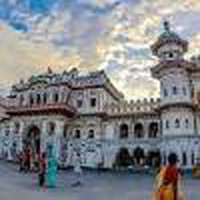

In [4]:
image.open('jan/178.jpeg resized.jpg')

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [44]:
import numpy as np
from matplotlib import image
from matplotlib import pyplot

In [7]:
imge=image.imread('jan/178.jpeg resized.jpg')

In [8]:
imge.shape

(200, 200, 3)

In [6]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(200, 200, 3), activation="relu"))
classifier.add(Conv2D(32, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2),padding='same'))
# Step 2 - Pooling
classifier.add(Conv2D(64, (3, 3), activation="relu"))
classifier.add(Conv2D(64, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2),padding='same'))

# Step 2 - Pooling
classifier.add(Conv2D(128, (3, 3), activation="relu"))
#classifier.add(Conv2D(128, (3, 3), activation="relu"))
#classifier.add(MaxPooling2D(pool_size = (2, 2),padding='same'))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(128,activation="relu"))

# Step 5 - Full connection
classifier.add(Dense(50,activation="relu"))




In [7]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 94, 94, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 45, 45, 128)      

In [8]:
classifier.input_shape
classifier.output_shape

(None, 50)

In [4]:

from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Concatenate

In [9]:
# Initialising the CNN
classifier1 = Sequential()

# Step 1 - Convolution
classifier1.add(Dense(50,input_shape=classifier.output_shape,activation="relu"))
classifier1.add(Dense(128,activation="relu"))
classifier1.add(Dense(50*50*7*1,activation="relu"))
classifier1.add(Reshape((50,50,7),input_shape=(50*50*7,)))
classifier1.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
classifier1.add(LeakyReLU(alpha=0.2))
classifier1.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
classifier1.add(LeakyReLU(alpha=0.2))
classifier1.add(Conv2D(3, (7,7), activation='relu', padding='same'))

In [10]:
classifier1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, None, 50)          2550      
_________________________________________________________________
dense_3 (Dense)              (None, None, 128)         6528      
_________________________________________________________________
dense_4 (Dense)              (None, None, 17500)       2257500   
_________________________________________________________________
reshape (Reshape)            (None, 50, 50, 7)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 100, 100, 128)     14464     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 100, 100, 128)     0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 200, 200, 128)    

In [15]:
classifier1.input_shape

(None, None, 50)

In [11]:
model =Sequential()

model.add(classifier)
model.add(classifier1)

In [12]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 50)                33323602  
_________________________________________________________________
sequential_2 (Sequential)    (None, 200, 200, 3)       2562133   
Total params: 35,885,735
Trainable params: 35,885,735
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.input_shape

(None, 200, 200, 3)

In [19]:
model.output_shape

(None, 200, 200, 3)

In [20]:
model.compile(optimizer = 'adam', loss = 'mse')

In [26]:
import os
test=[]
for filename in os.listdir('jan'):
   '''print(f'jan/',filename)'''
   f='jan/'+filename
   '''print(f)'''
   ima=image.imread(f)
   test.append(ima)
  

In [27]:
test=np.array(test)
'''test=test/255'''
np.save('test.npy',test)
test.shape

(423, 200, 200, 3)

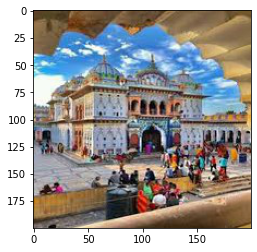

In [28]:
plt.imshow(test[2])

In [29]:

# fit the autoencoder model to reconstruct input
history = model.fit(test, test, epochs=200, batch_size=32, verbose=2)

Epoch 1/200
14/14 - 25s - loss: 24553.2168
Epoch 2/200
14/14 - 12s - loss: 6830.8174
Epoch 3/200
14/14 - 12s - loss: 3990.5242
Epoch 4/200
14/14 - 12s - loss: 3415.5374
Epoch 5/200
14/14 - 12s - loss: 3236.0015
Epoch 6/200
14/14 - 12s - loss: 3204.1577
Epoch 7/200
14/14 - 12s - loss: 3169.4856
Epoch 8/200
14/14 - 12s - loss: 3145.9949
Epoch 9/200
14/14 - 12s - loss: 3120.8970
Epoch 10/200
14/14 - 12s - loss: 3065.5107
Epoch 11/200
14/14 - 12s - loss: 2939.9458
Epoch 12/200
14/14 - 12s - loss: 2775.9917
Epoch 13/200
14/14 - 12s - loss: 2714.5479
Epoch 14/200
14/14 - 12s - loss: 2656.2456
Epoch 15/200
14/14 - 12s - loss: 2585.5815
Epoch 16/200
14/14 - 12s - loss: 2515.1990
Epoch 17/200
14/14 - 12s - loss: 2484.5867
Epoch 18/200
14/14 - 12s - loss: 2461.3127
Epoch 19/200
14/14 - 12s - loss: 2443.1633
Epoch 20/200
14/14 - 12s - loss: 2417.1677
Epoch 21/200
14/14 - 12s - loss: 2402.9780
Epoch 22/200
14/14 - 12s - loss: 2393.0840
Epoch 23/200
14/14 - 12s - loss: 2366.4888
Epoch 24/200
14/14 

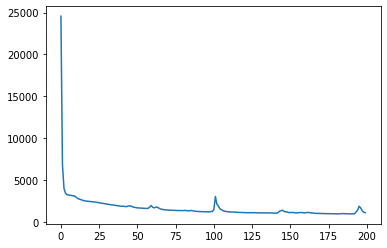

In [30]:
plt.plot(history.history['loss'], label='train')
plt.show()

In [31]:
classifier1.save('encoder.h5')

In [32]:
model.save('model.h5')

In [41]:
classifier1.input_shape

(None, None, 50)

In [53]:
t2.shape

(1, 50)

In [69]:
tested=model.predict(test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


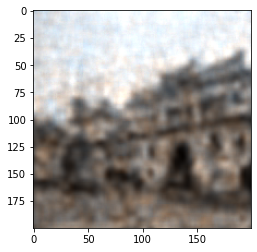

In [119]:
plt.imshow(tested[121]/255)
plt.imshow(tested[122]/255)

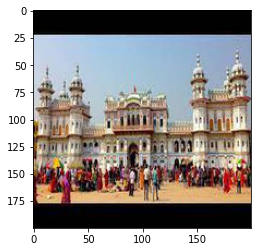

In [122]:
plt.imshow(test[99])

In [82]:
tested1=classifier.predict(test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


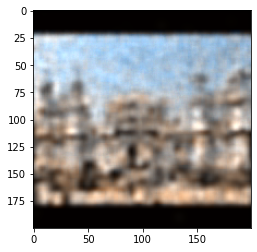

In [123]:
ff=tested1[99].reshape(1,50)
ff.shape
plt.imshow(classifier1.predict(ff).reshape(200,200,3)/255)

In [126]:
classifier.save('decode.h5')
files.download('decode.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [124]:
files.download('encoder.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [96]:
from google.colab import files



files.download('test.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [97]:
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
classifier.load_weights('decode.h5')

In [17]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 94, 94, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 45, 45, 128)      

In [18]:
test=np.load('test.npy')

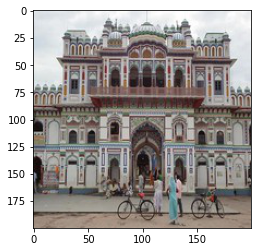

In [19]:
plt.imshow(test[13])

In [23]:
decoded=classifier.predict(test)

In [27]:
decoded[1]

array([   0.    , 4196.878 ,    0.    ,    0.    , 7286.75  ,    0.    ,
       4292.452 , 2551.8904, 3809.6208,    0.    ,    0.    , 2154.5088,
          0.    ,    0.    , 1357.985 , 4270.6377,    0.    ,    0.    ,
       4890.933 ,    0.    ,    0.    , 2833.5476,    0.    ,    0.    ,
       1448.3936,    0.    , 1450.3356, 3287.5647, 7354.9355,    0.    ,
       1394.718 ,    0.    ,    0.    , 1841.0828, 3190.4312, 2464.4595,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    , 2885.994 ,
       2438.8484,    0.    , 1186.913 , 2034.9646,    0.    ,    0.    ,
       5068.0776, 2038.6659], dtype=float32)

In [24]:
classifier1.load_weights('encoder.h5')

In [28]:
encoded=classifier1.predict(decoded)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


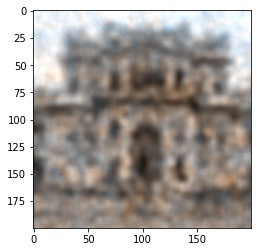

In [31]:
plt.imshow(encoded[13]/255)

In [60]:
from matplotlib import image
from PIL import Image
jan=Image.open('jan.jpg')
janre=jan.resize((200,200))
janre.save('rejan.jpg', 'JPEG', quality=90)


In [77]:
rejan=plt.imread('rejan.jpg')
rejan1=np.array(rejan)
rejan1.shape

(200, 200, 3)

In [81]:
rejan2=rejan1.reshape((1,200,200,3))

In [67]:
classifier.input_shape

(None, 200, 200, 3)

In [83]:
rejandecode=classifier.predict(rejan2)

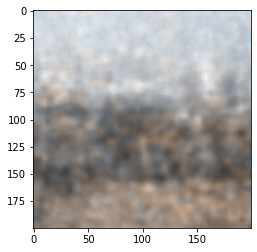

In [88]:
plt.imshow(classifier1.predict(rejandecode)[0]/255)

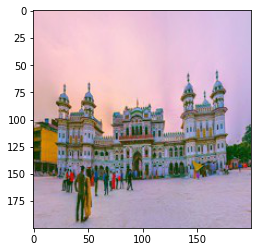

In [90]:
plt.imshow(plt.imread('rejan.jpg'))